In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
############# THINGS TO MODIFY
datapath="/Users/zanejobe/Dropbox/_CoRE/Rosie_Zane_working/Seaborn/"
filename="LobeFacies_TH_TR_Enviro" # analog data
filename2="PLData_TH_TR_Dist_Lith" # point loma data

# specify export file name
figname="LobeSubEnviro_TH_TR" 

# import data into pandas DataFrames
df = pd.read_csv(datapath + filename + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'group'])

pl = pd.read_csv(datapath + filename2 + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'dist', 'group'])


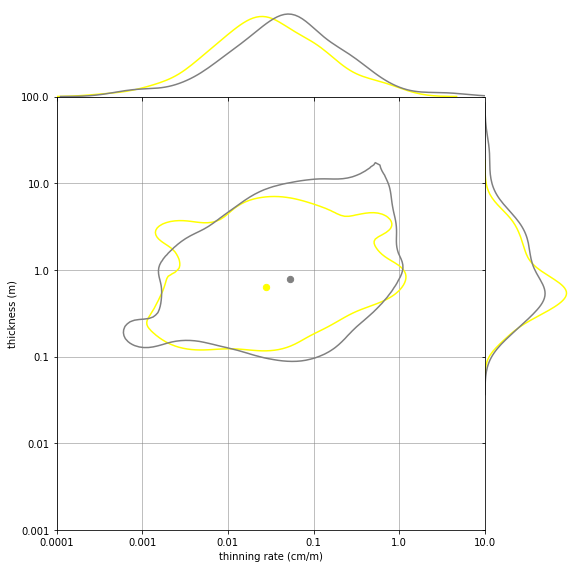

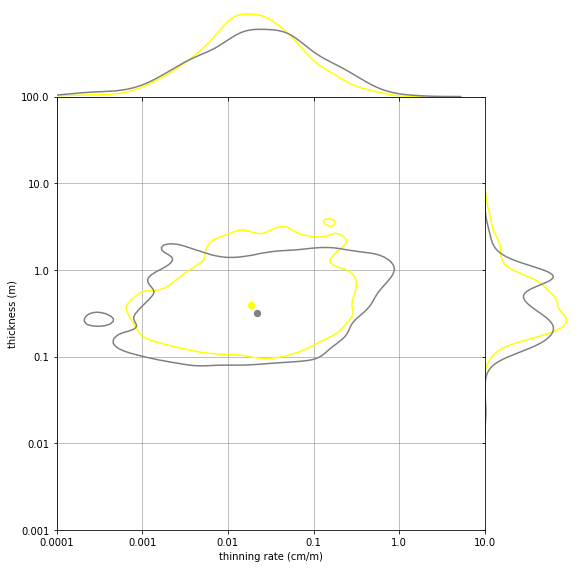

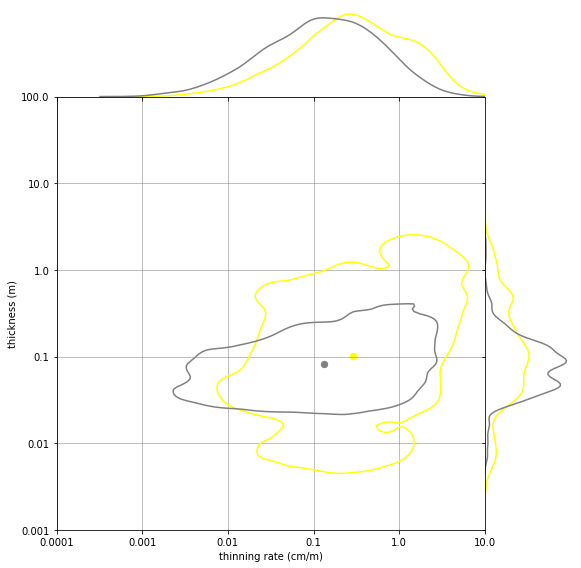

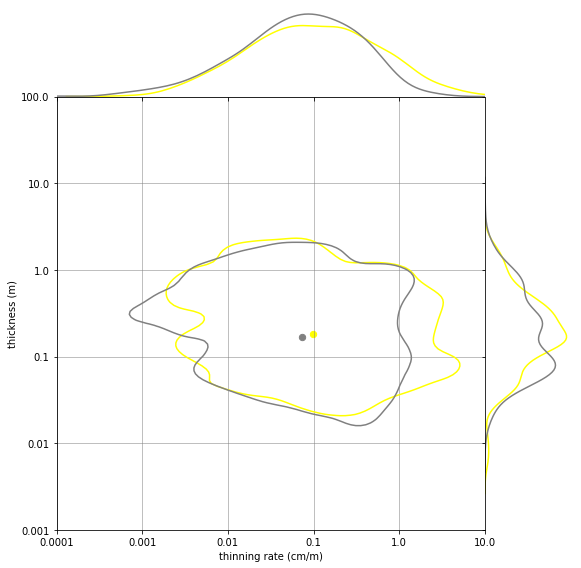

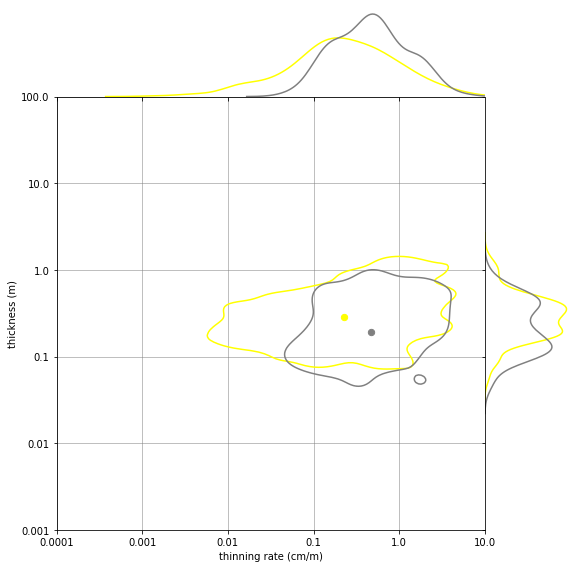

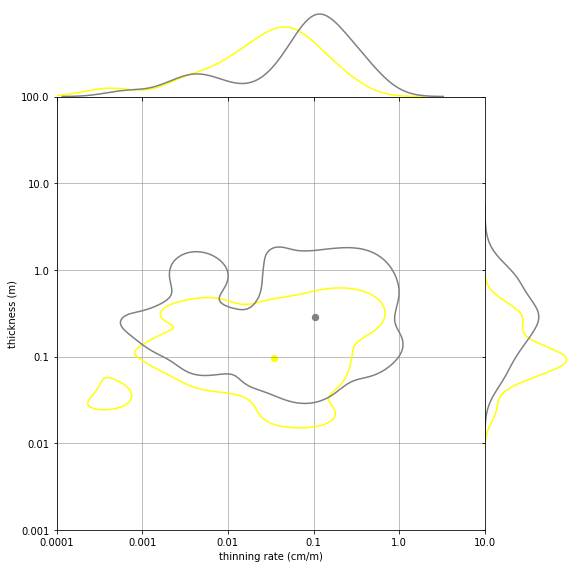

In [3]:
xlab="thinning rate (cm/m)"
ylab="thickness (m)"

colors=['yellow','grey']# mud then sand (i.e., 1 is sand confined prox, 2 is mud confined prox, 3 is sand confined distal, etc.)
titles=['confined proximal','confined distal','semiconfined proximal','semiconfined distal','unconfined proximal','unconfined distal']
titleno=0
for group, values in df.groupby("group"):
    
    if group % 2 == 1: # odd
        ncolor=0
        g = sns.JointGrid("tr", "th", df, size=8, space=0)  
    else: 
        ncolor=1 # even
    
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=40)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)

    xlim=[-6,-1]
    ylim=[-3,2]
    
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
    g.ax_joint.set_xlabel(xlab) 
    g.ax_joint.set_ylabel(ylab) 

    xtick=np.arange(xlim[0],xlim[1]+1,1)
    g.ax_joint.set_xticks(xtick) 
    xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
    xticklabel=xticklabel.astype(float)
    g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

    ytick=np.arange(ylim[0],ylim[1]+1,1)
    g.ax_joint.set_yticks(ytick) 
    yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
    yticklabel=yticklabel.astype(float)
    g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 
    
    g.ax_joint.set_title(titles[titleno])

    if ncolor == 1:
        plt.savefig(figname + '_' + titles[titleno] + ".pdf", transparent=True)
        titleno+=1


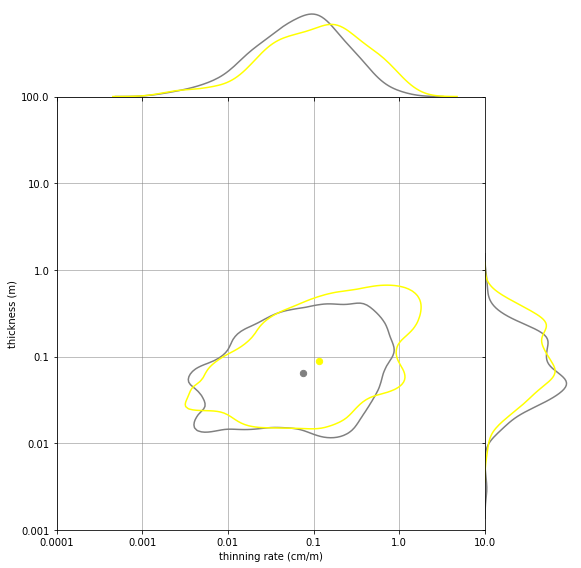

In [4]:
# NOW PLOT POINT LOMA
xlab="thinning rate (cm/m)"
ylab="thickness (m)"

colors=['yellow','grey']

g = sns.JointGrid("tr", "th", df, size=8, space=0)  

for group, values in pl.groupby("group"):
    if group == 1: # odd
        ncolor=0
    else: 
        ncolor=1 # even
    
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=40)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)

xlim=[-6,-1]
ylim=[-3,2]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 
    
g.ax_joint.set_title('Point Loma')

plt.savefig(figname + '_Point Loma' + ".pdf", transparent=True)